<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/LogisticRegression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()

# Create X from the features
X = iris.data

# Create y from output
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

In [ ]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

C: 10
Training accuracy: 0.6190476190476191
Test accuracy: 0.8

C: 1
Training accuracy: 0.7714285714285715
Test accuracy: 0.7333333333333333

C: 0.1
Training accuracy: 0.7904761904761904
Test accuracy: 0.7333333333333333

C: 0.001
Training accuracy: 0.3238095238095238
Test accuracy: 0.35555555555555557



In [ ]:
# Notice that as C decreases the model coefficients become smaller
##(for example from 4.36276075 when C=10 to 0.0.97175097 when C=0.1), until at C=0.001 all the coefficients are zero.
#This is the effect of the regularization penalty becoming more prominent.

In [ ]:
# 5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.667% (2.667%)


In [ ]:
# Construct a confusion matrix
test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[16  0  0]
 [ 0 14  5]
 [ 0  0 15]]


In [ ]:
test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.74      0.85        19
           2       0.75      1.00      0.86        15

    accuracy                           0.90        50
   macro avg       0.92      0.91      0.90        50
weighted avg       0.93      0.90      0.90        50



Text(0.5, 257.44, 'Predicted label')

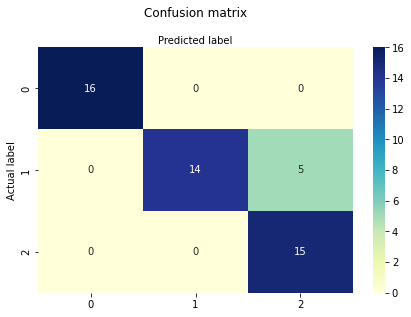

In [ ]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')